In [1]:
import sys 
sys.path.append("./utils/")

import os 
import shutil 

import torch  
import numpy as np 
from utils import plot_training_rst
from load_data import build_dataset 
from train_func import train_func

## Set the save folder

In [2]:
save_path = "./save_results/"
if os.path.exists(save_path): 
    shutil.rmtree(save_path)
os.mkdir(save_path)

## Build the training dataset

In [3]:
flag = "2V" 
X_data_train, y_data_train, X_data_test, y_data_test, X_data_predict = build_dataset(flag)  

## Train & Select the best performing model

In [4]:
loop_num = 50 
error_flag_test = 1e20    
for train_num in range(loop_num): 
    loss_rec_train, error_rec_train, loss_rec_test, error_rec_test, model = train_func(flag) 
    if error_rec_test[-1] <= error_flag_test: 
        error_flag_train = error_rec_train[-1] # update the error flag
        error_flag_test = error_rec_test[-1]   # update the error flag
        train_error = error_rec_train          # update the training error
        test_error = error_rec_test            # update the testing error
        model_sav = model 
        
        print("{ "+str(train_num)+" }", "Now the best model's testing error is", "%.5f" % error_flag_test)

{ 0 } Now the best model's testing error is 0.19312
{ 1 } Now the best model's testing error is 0.09719
{ 12 } Now the best model's testing error is 0.08685
{ 30 } Now the best model's testing error is 0.07316
{ 31 } Now the best model's testing error is 0.06070
{ 39 } Now the best model's testing error is 0.03336


##  Final test & prediction

### Evaluation in the training dataset

In [5]:
train_eval = [] # training evaluation 
elements = ["Mn", "Ti", "Fe",  "V", "Pd", "Cr", 
            "Mo", "Ru", "Ni", "Ag", "Pt", "Au"]

model_sav.eval() 
with torch.no_grad():
    for coord in X_data_train:
        outputs = model_sav(coord)
        train_eval.append(outputs.detach().numpy()) 
        
print("Prediction in training dataset", "\n") 
index = 0
for element in elements:
    print(element, train_eval[index])
    index += 1 

Prediction in training dataset 

Mn [-1.9327526]
Ti [-2.3822773]
Fe [-1.4426829]
V [-2.3017054]
Pd [-0.79578996]
Cr [-2.323215]
Mo [-2.7098832]
Ru [-1.5505335]
Ni [-0.7862912]
Ag [-1.5140699]
Pt [-1.0230776]
Au [-1.5609753]


### Evaluation in the testing dataset

In [6]:
elements = ["Co", "Cu"]
test_eval = [] 
model_sav.eval() 
with torch.no_grad(): 
    for coord in X_data_test:
        outputs = model_sav(coord)
        test_eval.append(outputs) 
        
print("Prediction in testing dataset", "\n") 
index = 0
for element in elements:
    print(element, test_eval[index])
    index += 1 

Prediction in testing dataset 

Co tensor([-0.9825])
Cu tensor([-1.5873])


### Predict the remaining TM elements

In [7]:
elements = [ "W", "Zn", "Zr", "Nb", "Rh", "Cd", "Hf", "Ta", 
            "Re", "Os", "Ir", "Hg", "Tc", "Sc",  "Y"]
predicts = [] 
model_sav.eval() 
with torch.no_grad():
    for coord in X_data_predict:
        outputs = model_sav(coord)
        predicts.append(outputs) 
        
print("Prediction in testing dataset", "\n") 
index = 0
for element in elements:
    print(element, predicts[index])
    index += 1         

Prediction in testing dataset 

W tensor([-2.6622])
Zn tensor([-1.7033])
Zr tensor([-2.3435])
Nb tensor([-2.6477])
Rh tensor([-0.8425])
Cd tensor([-1.7779])
Hf tensor([-2.7739])
Ta tensor([-2.6439])
Re tensor([-2.1951])
Os tensor([-1.7642])
Ir tensor([-1.1136])
Hg tensor([-2.0938])
Tc tensor([-2.2057])
Sc tensor([-2.6819])
Y tensor([-2.7677])


## Save the results

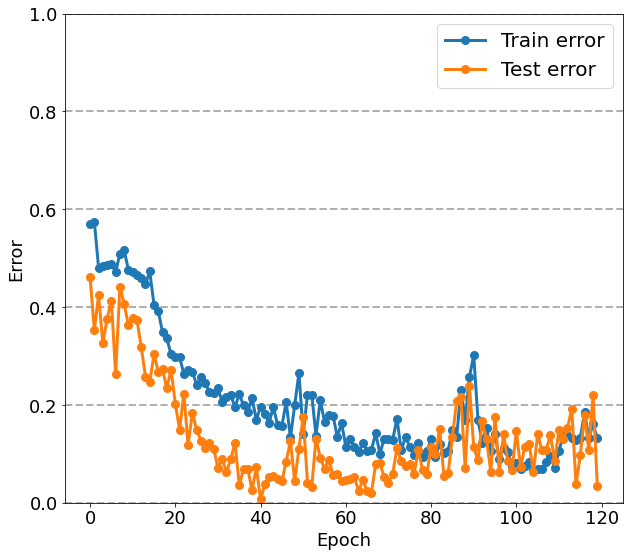

In [8]:
plot_training_rst(train_error, test_error) 
np.savetxt(save_path+"ML_results_"+flag+"_preditions.txt", np.array(predicts)) 
np.savetxt(save_path+"ML_results_"+flag+"_train.txt", np.array(train_eval)) 
np.savetxt(save_path+"ML_results_"+flag+"_test.txt", np.array(test_eval)) 
torch.save(model_sav.state_dict(), save_path+"atomic_net_"+flag+".pkl")